In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Creando datos para visualizar

In [4]:
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])
x = data[:,0]
y= data[:,1]

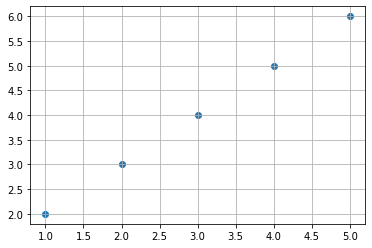

In [5]:
plt.scatter(x,y)
plt.grid(True)
plt.show()

Preprocesamiento de texto

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

In [7]:
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)

In [8]:
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [9]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [11]:
X.toarray()[1,2]

1

Aplicado a el dataset 20NewsGroups

In [12]:
from sklearn.datasets import fetch_20newsgroups

In [14]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics','sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


In [15]:
train_counts = vectorizer.fit_transform(twenty_train.data)

In [18]:
len(vectorizer.get_feature_names())

35788

In [16]:
vectorizer.vocabulary_.get('algorithm')

4690

In [21]:
vectorizer=CountVectorizer(stop_words='english')

In [22]:
sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

Stemming con NLTK

In [33]:
import nltk
import nltk.stem

In [24]:
s = nltk.stem.SnowballStemmer('english')

In [25]:
s.stem("cats")

'cat'

In [26]:
s.stem("loving")

'love'

In [32]:
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

In [42]:
english_stemmer=nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer=super(StemmedCountVectorizer,self).build_analyzer()
        return lambda doc:(english_stemmer.stem(w) for w in analyzer(doc))

In [37]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()

In [38]:
Y = stem_analyze("John bought carrots and potatoes")
for tok in Y:
    print(tok)

john
bought
carrot
potato


Aplicando stemming al 20newsgroups

In [39]:
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names())

26888

Otros usos de NLTK ademas de Stemming (ej: Pos Tagger)

In [27]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text = word_tokenize("And now for something completely different")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leo_g\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\leo_g\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\leo_g\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
nltk.pos_tag(text)   

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

NLTK CountVectorizer en español

In [41]:
spanish_stemmer=nltk.stem.SnowballStemmer('spanish')

class StemmedCountVectorizerSpanish(CountVectorizer):
    def build_analyzer(self):
        analyzer=super(StemmedCountVectorizer,self).build_analyzer()
        return lambda doc:(english_stemmer.stem(w) for w in analyzer(doc))

In [44]:
stem_vectorizer = StemmedCountVectorizerSpanish(min_df=1, stop_words='spanish')

In [48]:
documents = ['A Carlos se le rompio la computadora.','Amaria romper mi mouse a propósito para cambiar de computadora.']

for doc in documents:
    print('Analisis documento: ', doc)
    Y = stem_analyze(doc)
    for tok in Y:
        print(tok)

Analisis documento:  A Carlos se le rompio la computadora.
carlo
se
le
rompio
la
computadora
Analisis documento:  Amaria romper mi mouse a propósito para cambiar de computadora.
amaria
romper
mi
mous
propósito
para
cambiar
computadora
